# MSDS Supervised Learning Final Project: Wine Quality Model

Nowadays, there are so many options on what to buy, it can be overwhelming. That is too true in the wine industry. With all these options there are bound to be good wine choices, and not so good ones. In this notebook, we will use wine quality data to try and build a model that can predict the quality of the wine.

I created this notebook in google colab. Before you run the first cell, I recommend you dowload the data set from [Kaggle](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset?resource=download) or git hub [repository](https://github.com/poreeves/MSDS-Supervised-Learning-Wine). You can open this file in google colabs and browse for the file in your downloads. Or if you are using a desktop client to read the notebook just copy the path from your file directly into the pd.read_csv function.

In [2]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io


Saving WineQT.csv to WineQT.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [61]:
#be sure to update the path in the read csv to get the data in!
df = pd.read_csv(io.BytesIO(uploaded['WineQT.csv']))
df.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id']

## After importing Wine Quality data set, Let's begin Exploratory Data Analysis (EDA)

To get a feel for the data set, let's take a look at the features and the row

In [5]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Next, let's get an idea of the size, data types, and see if there are any missing data.

In [6]:
df.shape

(1143, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1143 non-null   float64
 1   volatile_acidity      1143 non-null   float64
 2   citric_acid           1143 non-null   float64
 3   residual_sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free_sulfur_dioxide   1143 non-null   float64
 6   total_sulfur_dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


It appears there isn't any missing data, however the Id feature doesn't seem to be of much use for us. Let's drop it.

In [8]:
df1 = df.drop('Id',axis =1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1143 non-null   float64
 1   volatile_acidity      1143 non-null   float64
 2   citric_acid           1143 non-null   float64
 3   residual_sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free_sulfur_dioxide   1143 non-null   float64
 6   total_sulfur_dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


Our target feature in this data set is going to be the quality column. To get a better understanding of the data and features, let's take a look at some descriptive statistics.

In [9]:
df1.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
df1.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile_acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric_acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual_sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free_sulfur_dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total_sulfur_dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


Now let’s create some graphs to get an understanding of the statistics we generated.

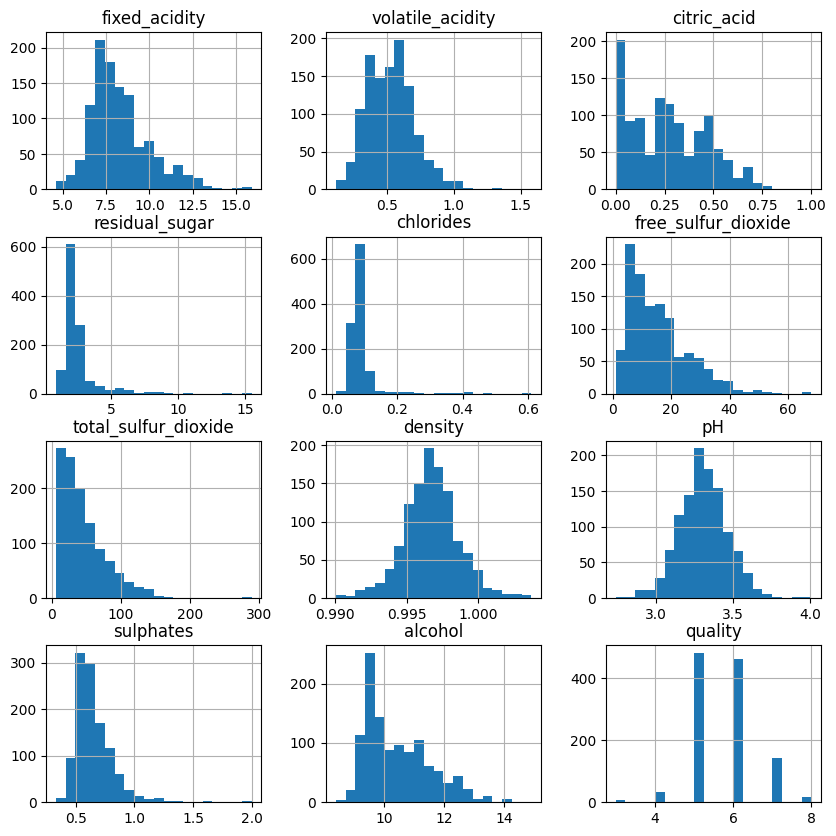

In [11]:
df1.hist(bins=20, figsize=(10, 10))
plt.show()

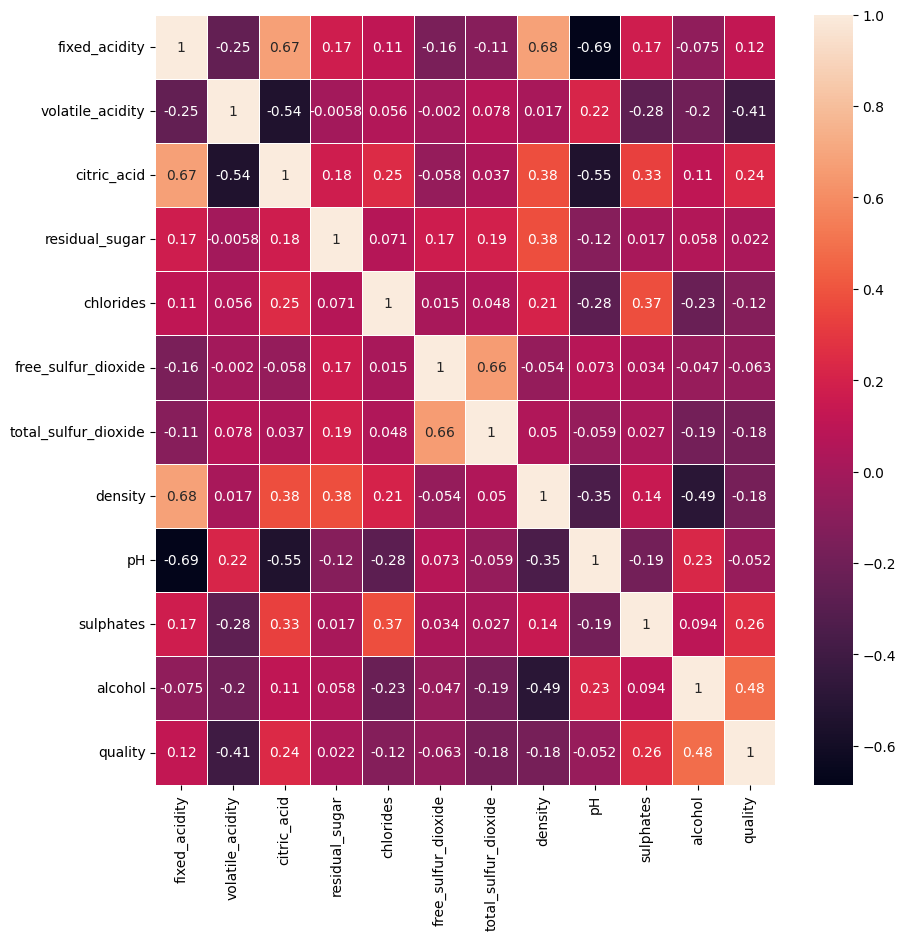

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(df1.corr(), linewidth=.5,annot=True)
plt.show()

The free sulfur dioxide and total sulfar dioxide are some what correlated according to the chart, as well as their names.
So let's drop one of them.

In [13]:
df2 = df1.drop('free_sulfur_dioxide',axis =1)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1143 non-null   float64
 1   volatile_acidity      1143 non-null   float64
 2   citric_acid           1143 non-null   float64
 3   residual_sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   total_sulfur_dioxide  1143 non-null   float64
 6   density               1143 non-null   float64
 7   pH                    1143 non-null   float64
 8   sulphates             1143 non-null   float64
 9   alcohol               1143 non-null   float64
 10  quality               1143 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 98.4 KB


In this notebook, we are going to take two approaches to building a predictive model. First, we are going to try and predict an actual value for the quality of the wine. Next, we will build a new categorical feature for the wine and build a classification model. Then we will compare the two.

# The Regression Model

Our first step is to split the data into train and test sets for our model.

In [15]:
dfr_target = df2['quality']
dfr_rest = df2

In [16]:
print(dfr_rest.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   total_sulfur_dioxide  density    pH  sulphates  alcohol  quality  
0                  34.0   0.9978  3.51       0.56      9.4        5  
1                  67.0   0.9968  3.20       0.68      9.8        5  
2                  54.0   0.9970  3.26       0.65      9.8        5  
3                  60.0   0.9980  3.16       0.58      9.8        6  
4                  34.0   0.9978  3.51       0.56      9.4        5  


In [17]:
train_Xr, test_Xr, train_yr, test_yr = train_test_split(dfr_rest,dfr_target,test_size=.25,random_state=10)


In order to determine which features can be used to best predict the quality of the wine, we will take a forward step refinement approach. We will identify the best features and add them one at a time.

In [18]:
r_results = []
f_results = []
top = ['',0]
features = dfr_rest.columns.drop('quality')
for i in features:
  model = smf.ols(formula = 'quality ~ '+i,data=train_Xr).fit()
  if model.rsquared>top[1]:
    top = [i, model.rsquared]

r_results.append(top[1])
f_results.append(top[0])
print(top)
print(r_results)

['alcohol', 0.2134579489526982]
[0.2134579489526982]


It appears alcohol was the top contender. Let's repeat this for another few features.

In [19]:
model2 = smf.ols(formula = 'quality ~ + alcohol',data=train_Xr).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     232.0
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           1.55e-46
Time:                        22:45:19   Log-Likelihood:                -913.31
No. Observations:                 857   AIC:                             1831.
Df Residuals:                     855   BIC:                             1840.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1488      0.231      9.305      0.000       1.696       2.602
alcohol        0.3353      0.022     15.233      0.000       0.292       0.378
==============================================================================
Omnibus:                       16.944   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.964
Skew:                          -0.092   Prob(JB):                     3.11e-07
Kurtosis:                       3.897   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
top = ['',0]
features = dfr_rest.columns.drop('quality','alcohol')
for i in features:
  model = smf.ols(formula = 'quality ~ alcohol + '+i,data=train_Xr).fit()
  if model.rsquared>top[1]:
    top = [i, model.rsquared]

r_results.append(top[1])
f_results.append(top[0])
print(top)
print(r_results)

['volatile_acidity', 0.3135463907350601]
[0.2134579489526982, 0.3135463907350601]


Volatile Acidity was our next big winner. Let's keep going.

In [21]:
top = ['',0]
features = dfr_rest.columns.drop(['quality','alcohol','volatile_acidity'])
for i in features:
  model = smf.ols(formula = 'quality ~ alcohol + volatile_acidity + '+i,data=train_Xr).fit()
  if model.rsquared>top[1]:
    top = [i, model.rsquared]

r_results.append(top[1])
f_results.append(top[0])
print(top)
print(r_results)

['sulphates', 0.3298495737100873]
[0.2134579489526982, 0.3135463907350601, 0.3298495737100873]


Sulphates in third!

In [22]:
top = ['',0]
features = dfr_rest.columns.drop(['quality','alcohol','volatile_acidity','sulphates'])
for i in features:
  model = smf.ols(formula = 'quality ~ alcohol + volatile_acidity + sulphates + '+i,data=train_Xr).fit()
  if model.rsquared>top[1]:
    top = [i, model.rsquared]

r_results.append(top[1])
f_results.append(top[0])
print(top)
print(r_results)

['total_sulfur_dioxide', 0.3412027962931078]
[0.2134579489526982, 0.3135463907350601, 0.3298495737100873, 0.3412027962931078]


Total Sulfur Dioxide!

In [23]:
top = ['',0]
features = dfr_rest.columns.drop(['quality','alcohol','volatile_acidity','sulphates','total_sulfur_dioxide'])
for i in features:
  model = smf.ols(formula = 'quality ~ alcohol + volatile_acidity + sulphates + total_sulfur_dioxide + '+i,data=train_Xr).fit()
  if model.rsquared>top[1]:
    top = [i, model.rsquared]

r_results.append(top[1])
f_results.append(top[0])
print(top)
print(r_results)

['chlorides', 0.3470006811318965]
[0.2134579489526982, 0.3135463907350601, 0.3298495737100873, 0.3412027962931078, 0.3470006811318965]


Let's try one more for good measure.

In [24]:
top = ['',0]
features = dfr_rest.columns.drop(['quality','alcohol','volatile_acidity','sulphates','total_sulfur_dioxide','chlorides'])
for i in features:
  model = smf.ols(formula = 'quality ~ alcohol + volatile_acidity + sulphates + total_sulfur_dioxide + chlorides +'+i,data=train_Xr).fit()
  if model.rsquared>top[1]:
    top = [i, model.rsquared]

r_results.append(top[1])
f_results.append(top[0])
print(top)
print(r_results)

['pH', 0.3527016637022309]
[0.2134579489526982, 0.3135463907350601, 0.3298495737100873, 0.3412027962931078, 0.3470006811318965, 0.3527016637022309]


Now that we have our model trained, lets see how it does with the testing set.

In [25]:
model_R = smf.ols(formula = 'quality ~ alcohol + volatile_acidity + sulphates + total_sulfur_dioxide + chlorides + pH',data=train_Xr).fit()
model_R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     77.19
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           5.98e-77
Time:                        22:45:19   Log-Likelihood:                -829.82
No. Observations:                 857   AIC:                             1674.
Df Residuals:                     850   BIC:                             1707.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.5097      0.519      8.691      0.000       3.491       5.528
alcohol                  0.2691      0.022     12.069      0.000       0.225       0.313
volatile_acidity        -1.0829      0.136     -7.976      0.000      -1.349      -0.816
sulphates                0.8513      0.156      5.462      0.000       0.545       1.157
total_sulfur_dioxide    -0.0027      0.001     -3.943      0.000      -0.004      -0.001
chlorides               -1.6825      0.512     -3.284      0.001      -2.688      -0.677
pH                      -0.4168      0.152     -2.736      0.006      -0.716      -0.118
==============================================================================
Omnibus:                       19.536   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.280
Skew:                          -0.218   Prob(JB):                     7.23e-07
Kurtosis:                       3.776   Cond. No.                     1.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

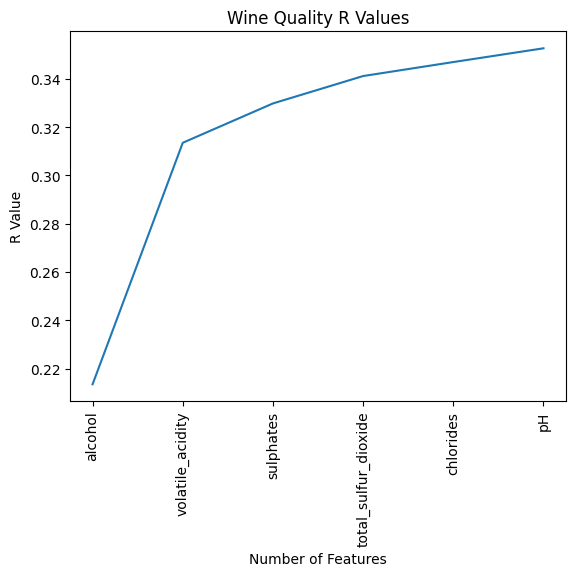

In [40]:
sns.lineplot(r_results)
plt.xlabel('Number of Features')
plt.xticks([0,1,2,3,4,5], labels = f_results,rotation='vertical')
plt.ylabel('R Value')
plt.title('Wine Quality R Values')
plt.show()

In [27]:
f_results

['alcohol',
 'volatile_acidity',
 'sulphates',
 'total_sulfur_dioxide',
 'chlorides',
 'pH']

In [28]:
df2.corr()['quality'].drop('quality')

fixed_acidity           0.121970
volatile_acidity       -0.407394
citric_acid             0.240821
residual_sugar          0.022002
chlorides              -0.124085
total_sulfur_dioxide   -0.183339
density                -0.175208
pH                     -0.052453
sulphates               0.257710
alcohol                 0.484866
Name: quality, dtype: float64

# The Classification Model

In order to create classification model, let’s divide the quality feature into a good/bad formant. First, let's check the distribution and stats.

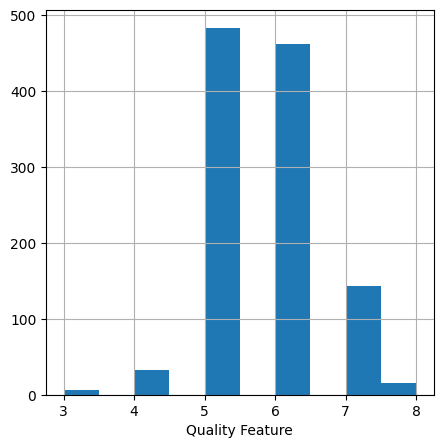

In [29]:
df2['quality'].hist(bins=10, figsize=(5, 5))
plt.xlabel('Quality Feature')
plt.show()

In [30]:
df2['quality'].describe()

count    1143.000000
mean        5.657043
std         0.805824
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

Now that we have an idea of how the quality feature is spread. Let's divided it into two groups. One above the 5 score and those below it. Are 1's will be our good quality and the 0's our not so good

In [31]:
df2['quality_class'] = [1 if x > 5 else 0 for x in df2.quality]

In [32]:
df2['quality_class'].value_counts()


1    621
0    522
Name: quality_class, dtype: int64

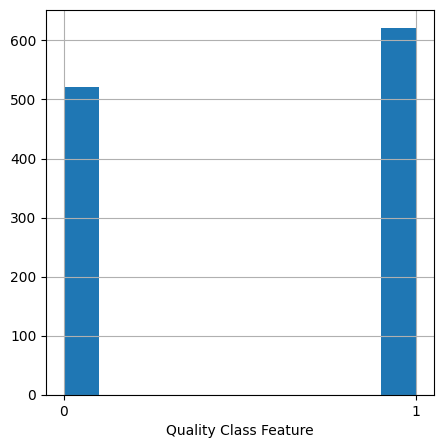

In [33]:
df2['quality_class'].hist( figsize=(5, 5))
plt.xlabel('Quality Class Feature')
plt.xticks([0,1])
plt.show()

Now that's we've seen how our good and bad qualities have been broked down. Lets build our model. First we must split the data.

In [34]:
features = df2.drop(['quality', 'quality_class'], axis=1)
target_c = df2['quality_class']

train_Xc, test_Xc, train_yc, test_yc = train_test_split(features, target_c, test_size=0.5, random_state=10)

We can normalize the data sets.

In [35]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(train_Xc)
xtest = norm.transform(test_Xc)

In [36]:
model_c = LogisticRegression(solver='liblinear').fit(train_Xc,train_yc)

In [54]:
ypp = model_c.predict_proba(test_Xc)
fpr,tpr,th = metrics.roc_curve(test_yc,ypp[:,1])
auc = metrics.roc_auc_score(test_yc,ypp[:,1])
precision = metrics.precision_score(test_yc, model_c.predict(test_Xc))
recall = metrics.recall_score(test_yc, model_c.predict(test_Xc))
accuracy = metrics.accuracy_score(test_yc, model_c.predict(test_Xc))
metrics.classification_report(test_yc, model_c.predict(test_Xc))
print('Presicion: ',precision)
print('Recall: ',recall)
print('Accuracy: ',accuracy)
print('ROC AUC: ',auc)


Presicion:  0.8096774193548387
Recall:  0.7943037974683544
Accuracy:  0.7832167832167832
ROC AUC:  0.8406472507911393


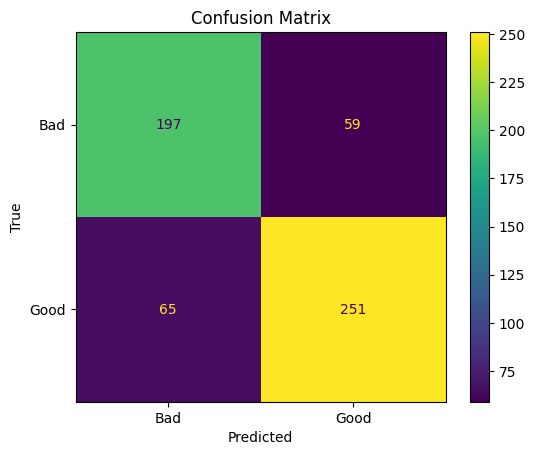

In [38]:
matrix = metrics.confusion_matrix(test_yc, model_c.predict(test_Xc))
disp = metrics.ConfusionMatrixDisplay(matrix)
disp.plot()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks([0,1], labels = ['Bad','Good'])
plt.yticks([0,1], labels = ['Bad','Good'])
plt.show()

Text(0, 0.5, 'TPR')

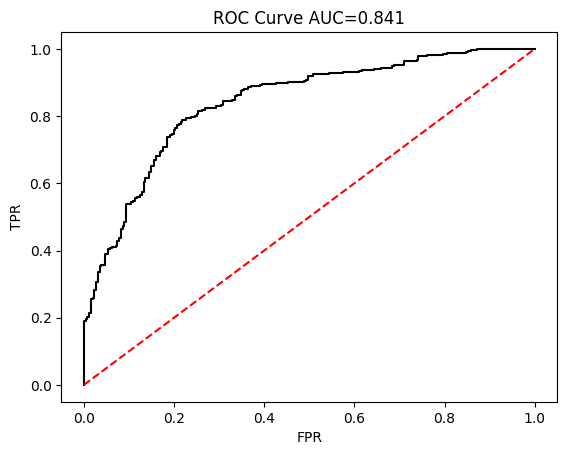

In [39]:
plt.plot(fpr,tpr,'k-')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),'r--')
plt.title('ROC Curve AUC=0.841')
plt.xlabel('FPR')
plt.ylabel('TPR')

# Results


OLS Regression Model:

In [41]:
model2 = smf.ols(formula = 'quality ~ + alcohol',data=train_Xr).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     232.0
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           1.55e-46
Time:                        22:51:36   Log-Likelihood:                -913.31
No. Observations:                 857   AIC:                             1831.
Df Residuals:                     855   BIC:                             1840.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1488      0.231      9.305      0.000       1.696       2.602
alcohol        0.3353      0.022     15.233      0.000       0.292       0.378
==============================================================================
Omnibus:                       16.944   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.964
Skew:                          -0.092   Prob(JB):                     3.11e-07
Kurtosis:                       3.897   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Ordinary Least Squares linear regression model was created using a forward step refinement approach. The regression model comprised of six features: alcohol, volatile_acidity, sulphates, total_sulfur_dioxide, chlorides, and pH. The target feature was quality. The R value for the first  step in the refinement approach was .21. It increased through the addition of the next five features to .34.
This final R score indicates that the model is not significant regression model in predicting the quality of wine.


Logistic Regression Classification Model

In [50]:
print('Presicion: ',precision)
print('Recall: ',recall)
print('Accuracy: ',accuracy)
print('ROC AUC: ',auc)

Presicion:  0.8096774193548387
Recall:  0.7943037974683544
Accuracy:  0.7832167832167832
ROC AUC:  0.8406472507911393


The Logistic Regression classification model was created and used to predict the class quality feature in the wine quality data set. Once the model was fitted and used to predict the class it resulted in 251 true positives, 197 true negatives, 59 false positives, and 65 false negatives. The precision score of the model was 0.809. The recall score was .0794. The accuracy score was 0.783. The Area under the Curve Receiver Operating Characteristic was 0.841.

# Conclusion

The OLS linear regression model did not perform well. It was not a good predictor of the quality of the wine. When looking at the correlation matrix before building the curve, I noticed there were not any strong correlations between the quality of the wine and the other features. Even though this is not a clear indication that the model would not perform, it does seem to be that way. Interestingly, when looking at the best predictor order that the forward step refinement process, it did select those features with a larger, absolute, correlation.


>


The Logistic Regression classification model performed well. It was able to identify the correct category of good or bad wine about 78% of the time. The number of false positives and false negatives were about the same. Depending on the person using this model, they may want to adjust the model to have lean one way or the other.

>


When comparing the two models, I would choose the classification model. By breaking the quality feature into two parts for the classification process, it limits the nuance that the linear regression model could have predicted had it performed better.
